# Numpy and Scipy Introduction

version 0.1

This work is licensed under a [MIT License](https://github.com/samuele-cozzi/physics/blob/main/LICENSE).

# Thanks to

- [Materiale per Fondamenti di Fisica Computazionale per Fisici @ UniCA.](https://www.dsf.unica.it/~fiore/fcstuff.html)
- [Notebook: A Crash Course in Python for Scientists](https://nbviewer.jupyter.org/gist/rpmuller/5920182)

## What You Need to Install

There are two branches of current releases in Python: the older-syntax Python 2, and the newer-syntax Python 3. This schizophrenia is largely intentional: when it became clear that some non-backwards-compatible changes to the language were necessary, the Python dev-team decided to go through a five-year (or so) transition, during which the new language features would be introduced and the old language was still actively maintained, to make such a transition as easy as possible. We're now (2013) past the halfway point, and, IMHO, at the first time when I'm considering making the change to Python 3.

Nonetheless, I'm going to write these notes with Python 2 in mind, since this is the version of the language that I use in my day-to-day job, and am most comfortable with. If these notes are important and are valuable to people, I'll be happy to rewrite the notes using Python 3.

With this in mind, these notes assume you have a Python distribution that includes:

* [Python](http://www.python.org) version 2.7;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.

A good, easy to install option that supports Mac, Windows, and Linux, and that has all of these packages (and much more) is the [Entought Python Distribution](https://www.enthought.com/products/epd), also known as EPD, which appears to be changing its name to Enthought Canopy. Enthought is a commercial company that supports a lot of very good work in scientific Python development and application. You can either purchase a license to use EPD, or there is also a [free version](https://www.enthought.com/products/epd/free/) that you can download and install.

Here are some other alternatives, should you not want to use EPD:

**Linux** Most distributions have an installation manager. Redhat has yum, Ubuntu has apt-get. To my knowledge, all of these packages should be available through those installers.

**Mac** I use [Macports](http://www.macports.org/), which has up-to-date versions of all of these packages.

**Windows** The [PythonXY](https://code.google.com/p/pythonxy/) package has everything you need: install the package, then go to Start > PythonXY > Command Prompts > IPython notebook server.

**Cloud** This notebook is currently not running on the [IPython notebook viewer](http://nbviewer.ipython.org/), but will be shortly, which will allow the notebook to be viewed but not interactively. I'm keeping an eye on [Wakari](http://www.wakari.io), from [Continuum Analytics](http://continuum.io/), which is a cloud-based IPython notebook. Wakari appears to support free accounts as well. Continuum is a company started by some of the core Enthought Numpy/Scipy people focusing on big data. 

Continuum also supports a bundled, multiplatform Python package called [Anaconda](https://store.continuum.io/) that I'll also keep an eye on.

# Numpy and Scipy

[Numpy](http://numpy.org) contains core routines for doing fast vector, matrix, and linear algebra-type operations in Python. [Scipy](http://scipy) contains additional routines for optimization, special functions, and so on. Both contain modules written in C and Fortran so that they're as fast as possible. Together, they give Python roughly the same capability that the [Matlab](http://www.mathworks.com/products/matlab/) program offers. (In fact, if you're an experienced Matlab user, there a [guide to Numpy for Matlab users](http://www.scipy.org/NumPy_for_Matlab_Users) just for you.)

In [458]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math
import random

## Making vectors and matrices
Fundamental to both Numpy and Scipy is the ability to work with vectors and matrices. You can create vectors from lists using the **array** command:

In [459]:
np.array([1,2,3,4,5,6])
[1,2,3,4,5,6]

[1, 2, 3, 4, 5, 6]

You can pass in a second argument to **array** that gives the numeric type. There are a number of types [listed here](http://docs.scipy.org/doc/numpy/user/basics.types.html) that your matrix can be. Some of these are aliased to single character codes. The most common ones are 'd' (double precision floating point number), 'D' (double precision complex number), and 'i' (int32). Thus,

In [460]:
np.array([1,2,3,4,5,6],'d')

array([1., 2., 3., 4., 5., 6.])

In [461]:
np.array([1,2,3,4,5,6],'D')

array([1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j])

In [462]:
np.array([1,2,3,4,5,6],'i')

array([1, 2, 3, 4, 5, 6], dtype=int32)

To build matrices, you can either use the array command with lists of lists:

In [463]:
np.array([[0,1],[1,0]],'d')
[[0,1],[1,0]]

[[0, 1], [1, 0]]

You can also form empty (zero) matrices of arbitrary shape (including vectors, which Numpy treats as vectors with one row), using the **zeros** command:

In [464]:
np.zeros((3,3),'d')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

The first argument is a tuple containing the shape of the matrix, and the second is the data type argument, which follows the same conventions as in the array command. Thus, you can make row vectors:

In [465]:
np.zeros(3,'d')

array([0., 0., 0.])

In [466]:
np.zeros((1,3),'d')

array([[0., 0., 0.]])

or column vectors:

In [467]:
np.zeros((3,1),'d')

array([[0.],
       [0.],
       [0.]])

There's also an **identity** command that behaves as you'd expect:

In [468]:
np.identity(4,'d')

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

as well as a **ones** command.

## Linspace, matrix functions, and plotting
The **linspace** command makes a linear array of points from a starting to an ending value.

In [469]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

If you provide a third argument, it takes that as the number of points in the space. If you don't provide the argument, it gives a length 50 linear space.

In [470]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

**linspace** is an easy way to make coordinates for plotting. Functions in the numpy library (all of which are imported into IPython notebook) can act on an entire vector (or even a matrix) of points at once. Thus,

In [471]:
x = np.linspace(0,2*math.pi)
np.sin(x)

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In conjunction with **matplotlib**, this is a nice way to plot things:

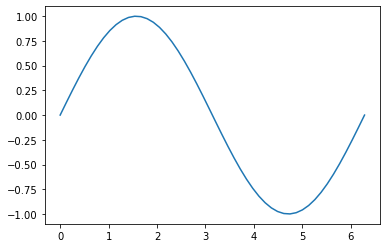

In [472]:
plt.plot(x,np.sin(x))

## Matrix operations
Matrix objects act sensibly when multiplied by scalars:

In [473]:
0.125*np.identity(3,'d')

array([[0.125, 0.   , 0.   ],
       [0.   , 0.125, 0.   ],
       [0.   , 0.   , 0.125]])

as well as when you add two matrices together. (However, the matrices have to be the same shape.)

In [474]:
np.identity(2,'d') + np.array([[1,1],[1,2]])

array([[2., 1.],
       [1., 3.]])

Something that confuses Matlab users is that the times (*) operator give element-wise multiplication rather than matrix multiplication:

In [475]:
np.identity(2)*np.ones((2,2))

array([[1., 0.],
       [0., 1.]])

To get matrix multiplication, you need the **dot** command:

In [476]:
np.dot(np.identity(2),np.ones((2,2)))

array([[1., 1.],
       [1., 1.]])

**dot** can also do dot products (duh!):

In [477]:
v = np.array([3,4],'d')
np.sqrt(np.dot(v,v))

5.0

as well as matrix-vector products.

There are **determinant**, **inverse**, and **transpose** functions that act as you would suppose. Transpose can be abbreviated with ".T" at the end of a matrix object:

In [478]:
m = np.array([[1,2],[3,4]])
m.T

array([[1, 3],
       [2, 4]])

There's also a **diag()** function that takes a list or a vector and puts it along the diagonal of a square matrix. 

In [479]:
np.diag([1,2,3,4,5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

We'll find this useful later on.

## Matrix Solvers
You can solve systems of linear equations using the **solve** command:

In [480]:
A = np.array([[1,1,1],[0,2,5],[2,5,-1]])
b = np.array([6,-4,27])
np.linalg.solve(A,b)

array([ 5.,  3., -2.])

There are a number of routines to compute eigenvalues and eigenvectors

* **eigvals** returns the eigenvalues of a matrix
* **eigvalsh** returns the eigenvalues of a Hermitian matrix
* **eig** returns the eigenvalues and eigenvectors of a matrix
* **eigh** returns the eigenvalues and eigenvectors of a Hermitian matrix.

In [481]:
A = np.array([[13,-4],[-4,7]],'d')
np.linalg.eigvalsh(A)

array([ 5., 15.])

In [482]:
np.linalg.eigh(A)

(array([ 5., 15.]),
 array([[-0.4472136 , -0.89442719],
        [-0.89442719,  0.4472136 ]]))

## Example: Finite Differences
Now that we have these tools in our toolbox, we can start to do some cool stuff with it. Many of the equations we want to solve in Physics involve differential equations. We want to be able to compute the derivative of functions:

$$ y' = \frac{y(x+h)-y(x)}{h} $$

by *discretizing* the function $y(x)$ on an evenly spaced set of points $x_0, x_1, \dots, x_n$, yielding $y_0, y_1, \dots, y_n$. Using the discretization, we can approximate the derivative by

$$ y_i' \approx \frac{y_{i+1}-y_{i-1}}{x_{i+1}-x_{i-1}} $$

We can write a derivative function in Python via

In [483]:
def nderiv(y,x):
    "Finite difference derivative of the function f"
    n = len(y)
    d = np.zeros(n,'d') # assume double
    # Use centered differences for the interior points, one-sided differences for the ends
    for i in range(1,n-1):
        d[i] = (y[i+1]-y[i-1])/(x[i+1]-x[i-1])
    d[0] = (y[1]-y[0])/(x[1]-x[0])
    d[n-1] = (y[n-1]-y[n-2])/(x[n-1]-x[n-2])
    return d

Let's see whether this works for our sin example from above:

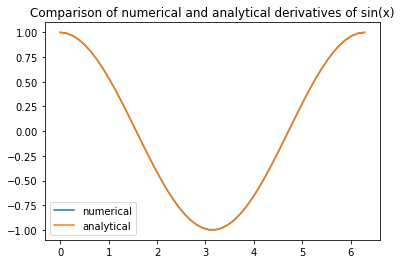

In [484]:
x = np.linspace(0,2*np.pi)
dsin = nderiv(np.sin(x),x)
plt.plot(x,dsin,label='numerical')
plt.plot(x,np.cos(x),label='analytical')
plt.title("Comparison of numerical and analytical derivatives of sin(x)")
plt.legend()

Pretty close!

## One-Dimensional Harmonic Oscillator using Finite Difference
Now that we've convinced ourselves that finite differences aren't a terrible approximation, let's see if we can use this to solve the one-dimensional harmonic oscillator.

We want to solve the time-independent Schrodinger equation

$$ -\frac{\hbar^2}{2m}\frac{\partial^2\psi(x)}{\partial x^2} + V(x)\psi(x) = E\psi(x)$$

for $\psi(x)$ when $V(x)=\frac{1}{2}m\omega^2x^2$ is the harmonic oscillator potential. We're going to use the standard trick to transform the differential equation into a matrix equation by multiplying both sides by $\psi^*(x)$ and integrating over $x$. This yields

$$ -\frac{\hbar}{2m}\int\psi(x)\frac{\partial^2}{\partial x^2}\psi(x)dx + \int\psi(x)V(x)\psi(x)dx = E$$

We will again use the finite difference approximation. The finite difference formula for the second derivative is

$$ y'' = \frac{y_{i+1}-2y_i+y_{i-1}}{x_{i+1}-x_{i-1}} $$

We can think of the first term in the Schrodinger equation as the overlap of the wave function $\psi(x)$ with the second derivative of the wave function $\frac{\partial^2}{\partial x^2}\psi(x)$. Given the above expression for the second derivative, we can see if we take the overlap of the states $y_1,\dots,y_n$ with the second derivative, we will only have three points where the overlap is nonzero, at $y_{i-1}$, $y_i$, and $y_{i+1}$. In matrix form, this leads to the tridiagonal Laplacian matrix, which has -2's along the diagonals, and 1's along the diagonals above and below the main diagonal.

The second term turns leads to a diagonal matrix with $V(x_i)$ on the diagonal elements. Putting all of these pieces together, we get:

In [485]:
def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*np.identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

Text(0, 0.5, 'Energy (hartree)')

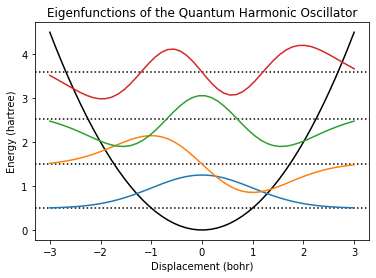

In [486]:
x = np.linspace(-3,3)
m = 1.0
ohm = 1.0
T = (-0.5/m)*Laplacian(x)
V = 0.5*(ohm**2)*(x**2)
H =  T + np.diag(V)
E,U = np.linalg.eigh(H)
h = x[1]-x[0]

# Plot the Harmonic potential
plt.plot(x,V,color='k')

for i in range(4):
    # For each of the first few solutions, plot the energy level:
    plt.axhline(y=E[i],color='k',ls=":")
    # as well as the eigenfunction, displaced by the energy level so they don't
    # all pile up on each other:
    plt.plot(x,-U[:,i]/np.sqrt(h)+E[i])
plt.title("Eigenfunctions of the Quantum Harmonic Oscillator")
plt.xlabel("Displacement (bohr)")
plt.ylabel("Energy (hartree)")

We've made a couple of hacks here to get the orbitals the way we want them. First, I inserted a -1 factor before the wave functions, to fix the phase of the lowest state. The phase (sign) of a quantum wave function doesn't hold any information, only the square of the wave function does, so this doesn't really change anything. 

But the eigenfunctions as we generate them aren't properly normalized. The reason is that finite difference isn't a real basis in the quantum mechanical sense. It's a basis of Dirac δ functions at each point; we interpret the space betwen the points as being "filled" by the wave function, but the finite difference basis only has the solution being at the points themselves. We can fix this by dividing the eigenfunctions of our finite difference Hamiltonian by the square root of the spacing, and this gives properly normalized functions.

## Special Functions
The solutions to the Harmonic Oscillator are supposed to be Hermite polynomials. The Wikipedia page has the HO states given by

$$\psi_n(x) = \frac{1}{\sqrt{2^n n!}}
\left(\frac{m\omega}{\pi\hbar}\right)^{1/4}
\exp\left(-\frac{m\omega x^2}{2\hbar}\right)
H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right)$$

Let's see whether they look like those. There are some special functions in the Numpy library, and some more in Scipy. Hermite Polynomials are in Numpy:

In [487]:
def ho_evec(x,n,m,ohm):
    vec = [0]*9
    vec[n] = 1
    Hn = np.polynomial.hermite.Hermite(vec)
    return (1/np.sqrt(2**n*math.factorial(n)))*pow(m*ohm/np.pi,0.25)*np.exp(-0.5*m*ohm*x**2)*Hn(x*np.sqrt(m*ohm))

Let's compare the first function to our solution.

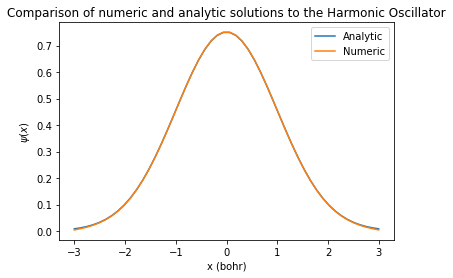

In [488]:
plt.plot(x,ho_evec(x,0,1,1),label="Analytic")
plt.plot(x,-U[:,0]/np.sqrt(h),label="Numeric")
plt.xlabel('x (bohr)')
plt.ylabel(r'$\psi(x)$')
plt.title("Comparison of numeric and analytic solutions to the Harmonic Oscillator")
plt.legend()

The agreement is almost exact.

We can use the **subplot** command to put multiple comparisons in different panes on a single plot:

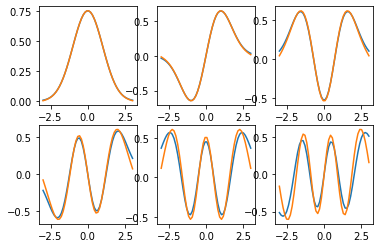

In [489]:
phase_correction = [-1,1,1,-1,-1,1]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.plot(x,ho_evec(x,i,1,1),label="Analytic")
    plt.plot(x,phase_correction[i]*U[:,i]/np.sqrt(h),label="Numeric")

Other than phase errors (which I've corrected with a little hack: can you find it?), the agreement is pretty good, although it gets worse the higher in energy we get, in part because we used only 50 points.

The Scipy module has many more special functions:

Text(0.5, 1.0, 'Legendre polynomials')

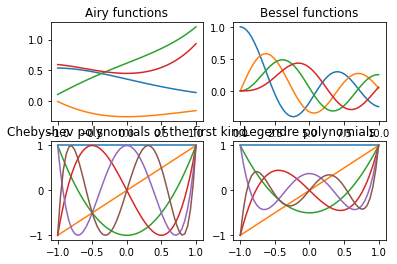

In [490]:
from scipy.special import airy,jn,eval_chebyt,eval_legendre
plt.subplot(2,2,1)
x = np.linspace(-1,1)
Ai,Aip,Bi,Bip = airy(x)
plt.plot(x,Ai)
plt.plot(x,Aip)
plt.plot(x,Bi)
plt.plot(x,Bip)
plt.title("Airy functions")

plt.subplot(2,2,2)
x = np.linspace(0,10)
for i in range(4):
    plt.plot(x,jn(i,x))
plt.title("Bessel functions")

plt.subplot(2,2,3)
x = np.linspace(-1,1)
for i in range(6):
    plt.plot(x,eval_chebyt(i,x))
plt.title("Chebyshev polynomials of the first kind")

plt.subplot(2,2,4)
x = np.linspace(-1,1)
for i in range(6):
    plt.plot(x,eval_legendre(i,x))
plt.title("Legendre polynomials")

As well as Jacobi, Laguerre, Hermite polynomials, Hypergeometric functions, and many others. There's a full listing at the [Scipy Special Functions Page](http://docs.scipy.org/doc/scipy/reference/special.html).

## Least squares fitting
Very often we deal with some data that we want to fit to some sort of expected behavior. Say we have the following:

In [491]:
raw_data = """\
3.1905781584582433,0.028208609537968457
4.346895074946466,0.007160804747670053
5.374732334047101,0.0046962988461934805
8.201284796573875,0.0004614473299618756
10.899357601713055,0.00005038370219939726
16.295503211991434,4.377451812785309e-7
21.82012847965739,3.0799922117601088e-9
32.48394004282656,1.524776208284536e-13
43.53319057815846,5.5012073588707224e-18"""

There's a section below on parsing CSV data. We'll steal the parser from that. For an explanation, skip ahead to that section. Otherwise, just assume that this is a way to parse that text into a numpy array that we can plot and do other analyses with.

In [492]:
# data = []
# for line in raw_data.splitlines():
#     words = line.split(',')
#     data.append(map(float,words))
# data = np.array(data)

# print(list(data[2])[0])

data = np.loadtxt("files/020/raw_data.txt",float)

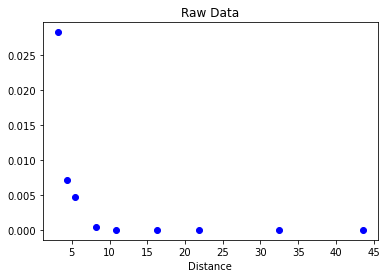

In [493]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.plot(data[:,0],data[:,1],'bo')

Since we expect the data to have an exponential decay, we can plot it using a semi-log plot.

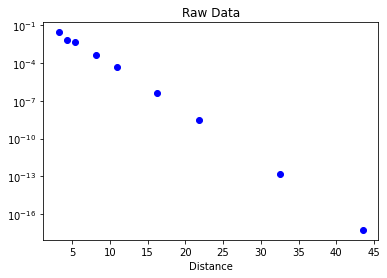

In [494]:
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')

For a pure exponential decay like this, we can fit the log of the data to a straight line. The above plot suggests this is a good approximation. Given a function
$$ y = Ae^{-ax} $$
$$ \log(y) = \log(A) - ax$$
Thus, if we fit the log of the data versus x, we should get a straight line with slope $a$, and an intercept that gives the constant $A$.

There's a numpy function called **polyfit** that will fit data to a polynomial form. We'll use this to fit to a straight line (a polynomial of order 1)

In [495]:
logValues = np.log(data[:,1])

params = np.polyfit(data[:,0],logValues,1)
a = params[0]
A = np.exp(params[1])

Let's see whether this curve fits the data.

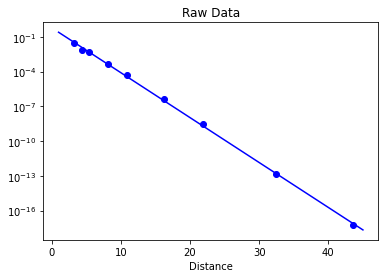

In [496]:
x = np.linspace(1,45)
plt.title("Raw Data")
plt.xlabel("Distance")
plt.semilogy(data[:,0],data[:,1],'bo')
plt.semilogy(x,A*np.exp(a*x),'b-')

If we have more complicated functions, we may not be able to get away with fitting to a simple polynomial. Consider the following data:

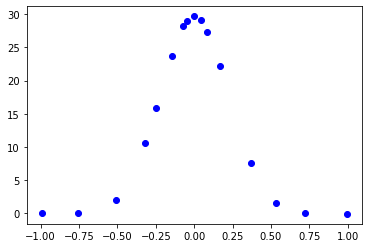

In [497]:
gauss_data = """\
-0.9902286902286903,1.4065274110372852e-19
-0.7566104566104566,2.2504438576596563e-18
-0.5117810117810118,1.9459459459459454
-0.31887271887271884,10.621621621621626
-0.250997150997151,15.891891891891893
-0.1463309463309464,23.756756756756754
-0.07267267267267263,28.135135135135133
-0.04426734426734419,29.02702702702703
-0.0015939015939017698,29.675675675675677
0.04689304689304685,29.10810810810811
0.0840994840994842,27.324324324324326
0.1700546700546699,22.216216216216214
0.370878570878571,7.540540540540545
0.5338338338338338,1.621621621621618
0.722014322014322,0.08108108108108068
0.9926849926849926,-0.08108108108108646"""

data = []
# for line in gauss_data.splitlines():
#     words = line.split(',')
#     data.append(map(float,words))
# data = np.array(data)

data = np.loadtxt("files/020/gauss_data.csv",float, delimiter=',')

plt.plot(data[:,0],data[:,1],'bo')

This data looks more Gaussian than exponential. If we wanted to, we could use **polyfit** for this as well, but let's use the **curve_fit** function from Scipy, which can fit to arbitrary functions. You can learn more using help(curve_fit).

First define a general Gaussian function to fit to.

In [498]:
def gauss(x,A,a): return A*np.exp(a*x**2)

Now fit to it using **curve_fit**:

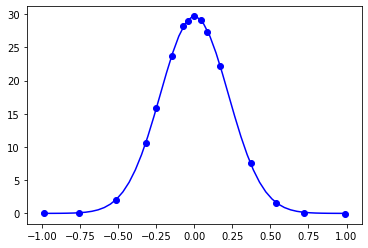

In [499]:
params,conv = sc.optimize.curve_fit(gauss,data[:,0],data[:,1])
x = np.linspace(-1,1)
plt.plot(data[:,0],data[:,1],'bo')
A,a = params
plt.plot(x,gauss(x,A,a),'b-')

The **curve_fit** routine we just used is built on top of a very good general **minimization** capability in Scipy. You can learn more [at the scipy documentation pages](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).

## Monte Carlo, random numbers, and computing $\pi$
Many methods in scientific computing rely on Monte Carlo integration, where a sequence of (pseudo) random numbers are used to approximate the integral of a function. Python has good random number generators in the standard library. The **random()** function gives pseudorandom numbers uniformly distributed between 0 and 1:

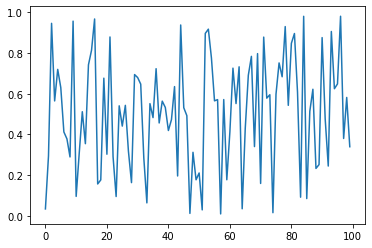

In [500]:
rands = []
for i in range(100):
    rands.append(random.random())
plt.plot(rands)

**random()** uses the [Mersenne Twister](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html) algorithm, which is a highly regarded pseudorandom number generator. There are also functions to generate random integers, to randomly shuffle a list, and functions to pick random numbers from a particular distribution, like the normal distribution:

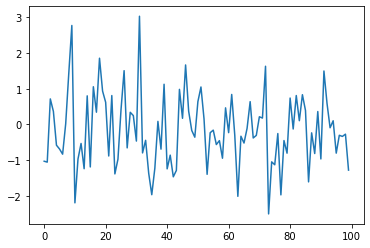

In [501]:
grands = []
for i in range(100):
    grands.append(random.gauss(0,1))
plt.plot(grands)

It is generally more efficient to generate a list of random numbers all at once, particularly if you're drawing from a non-uniform distribution. Numpy has functions to generate vectors and matrices of particular types of random distributions.

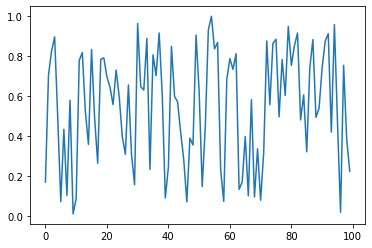

In [502]:
plt.plot(np.random.rand(100))

One of the first programs I ever wrote was a program to compute $\pi$ by taking random numbers as x and y coordinates, and counting how many of them were in the unit circle. For example:

<Figure size 576x432 with 0 Axes>

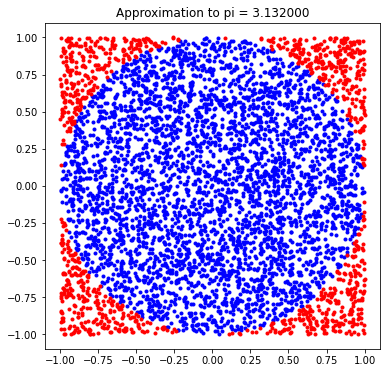

<Figure size 576x432 with 0 Axes>

In [503]:
npts = 5000
xs = 2*np.random.rand(npts)-1
ys = 2*np.random.rand(npts)-1
r = xs**2+ys**2
ninside = (r<1).sum()
plt.figure(figsize=(6,6))
#figsize(6,6) # make the figure square
plt.title("Approximation to pi = %f" % (4*ninside/float(npts)))
plt.plot(xs[r<1],ys[r<1],'b.')
plt.plot(xs[r>1],ys[r>1],'r.')
plt.figure(figsize=(8,6))
#figsize(8,6) # change the figsize back to 4x3 for the rest of the notebook

The idea behind the program is that the ratio of the area of the unit circle to the square that inscribes it is $\pi/4$, so by counting the fraction of the random points in the square that are inside the circle, we get increasingly good estimates to $\pi$. 

The above code uses some higher level Numpy tricks to compute the radius of each point in a single line, to count how many radii are below one in a single line, and to filter the x,y points based on their radii. To be honest, I rarely write code like this: I find some of these Numpy tricks a little too cute to remember them, and I'm more likely to use a list comprehension (see below) to filter the points I want, since I can remember that.

As methods of computing $\pi$ go, this is among the worst. A much better method is to use Leibniz's expansion of arctan(1):

$$\frac{\pi}{4} = \sum_k \frac{(-1)^k}{2*k+1}$$

In [504]:
n = 100
total = 0
for k in range(n):
    total += pow(-1,k)/(2*k+1.0)
print (4*total)

3.1315929035585537


If you're interested a great method, check out [Ramanujan's method](http://en.wikipedia.org/wiki/Approximations_of_%CF%80). This converges so fast you really need arbitrary precision math to display enough decimal places. You can do this with the Python **decimal** module, if you're interested.

## Numerical Integration
Integration can be hard, and sometimes it's easier to work out a definite integral using an approximation. For example, suppose we wanted to figure out the integral:

$$\int_0^\infty\exp(-x)dx=1$$

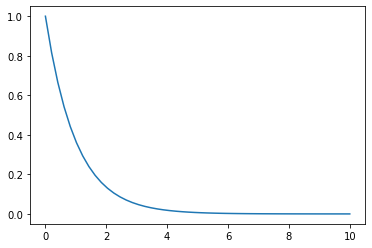

In [505]:
def f(x): return np.exp(-x)
x = np.linspace(0,10)
plt.plot(x,np.exp(-x))

Scipy has a numerical integration routine **quad** (since sometimes numerical integration is called *quadrature*), that we can use for this:

In [506]:
sc.integrate.quad(f,0,np.inf)

(1.0000000000000002, 5.842606996763696e-11)

There are also 2d and 3d numerical integrators in Scipy. [See the docs](http://docs.scipy.org/doc/scipy/reference/integrate.html) for more information.

## Fast Fourier Transform and Signal Processing


Very often we want to use FFT techniques to help obtain the signal from noisy data. Scipy has several different options for this.

[0.00000000e+00 3.00075019e-02 6.00150038e-02 ... 1.19939985e+02
 1.19969992e+02 1.20000000e+02]
[ 0.51976213  8.97438727  9.08827855 ... -5.7352802  -8.00597985
  0.02175656]


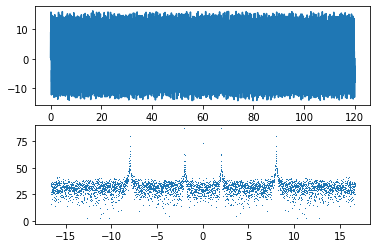

In [507]:
npts = 4000
nplot = npts/10
t = np.linspace(0,120,npts)

def acc(t): return 10*np.sin(2*np.pi*2.0*t) + 5*np.sin(2*np.pi*8.0*t) + 2*np.random.rand(npts)

signal = acc(t)

FFT = abs(sc.fftpack.fft(signal))
freqs = sc.fftpack.fftfreq(npts, t[1]-t[0])

print(t)
print(signal)

plt.subplot(211)
plt.plot(t, signal)
plt.subplot(212)
plt.plot(freqs,20*np.log10(FFT),',')
plt.show()

There are additional signal processing routines in Scipy that you can [read about here](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html).

# References

## Learning Resources
* [Official Python Documentation](http://docs.python.org/2.7), including
    - [Python Tutorial](http://docs.python.org/2.7/tutorial)
    - [Python Language Reference](http://docs.python.org/2.7/reference)
* If you're interested in Python 3, the [Official Python 3 Docs are here](http://docs.python.org/3/).
* [IPython tutorial](http://ipython.org/ipython-doc/dev/interactive/tutorial.html).
* [Learn Python The Hard Way](http://learnpythonthehardway.org/book/)
* [Dive Into Python](http://www.diveintopython.net/), in particular if you're interested in Python 3.
* [Invent With Python](http://inventwithpython.com/), probably best for kids.
* [Python Functional Programming HOWTO](http://docs.python.org/2/howto/functional.html)
* [The Structure and Interpretation of Computer Programs](http://mitpress.mit.edu/sicp/full-text/book/book.html), written in Scheme, a Lisp dialect, but one of the best books on computer programming ever written.
* [Generator Tricks for Systems Programmers](http://www.dabeaz.com/generators/) Beazley's slides on just what generators can do for you.
* [Python Module of the Week](http://pymotw.com/2/contents.html) is a series going through in-depth analysis of the Python standard library in a very easy to understand way.

## Badass IPython Notebooks
* Rob Johansson's [excellent notebooks](http://jrjohansson.github.io/), including [Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures) and [Computational Quantum Physics with QuTiP](https://github.com/jrjohansson/qutip-lectures) lectures;
* [XKCD style graphs in matplotlib](http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/XKCD_plots.ipynb);
* [A collection of Notebooks for using IPython effectively](https://github.com/ipython/ipython/tree/master/examples/notebooks#a-collection-of-notebooks-for-using-ipython-effectively)
* [A gallery of interesting IPython Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)
* [Cross-disciplinary computational analysis IPython Notebooks From Hadoop World 2012](https://github.com/invisibleroads/crosscompute-tutorials)
* [Quantites](http://nbviewer.ipython.org/urls/raw.github.com/tbekolay/pyconca2012/master/QuantitiesTutorial.ipynb) Units in Python.
    - [Another units module is here](http://www.southampton.ac.uk/~fangohr/blog/)

## Packages for Scientists
Important libraries

* [Python](http://www.python.org) version 2.7;
* [Numpy](http://www.numpy.org), the core numerical extensions for linear algebra and multidimensional arrays;
* [Scipy](http://www.scipy.org), additional libraries for scientific programming;
* [Matplotlib](http://matplotlib.sf.net), excellent plotting and graphing libraries;
* [IPython](http://ipython.org), with the additional libraries required for the notebook interface.
* [Sympy](http://sympy.org), symbolic math in Python
* [Pandas](http://pandas.pydata.org/) library for big data in Python

Other packages of interest

* [PyQuante](http://pyquante.sf.net) Python Quantum Chemistry
* [QuTiP](https://code.google.com/p/qutip/) Quantum Toolbox in Python
* Konrad Hinsen's [Scientific Python](http://dirac.cnrs-orleans.fr/plone/software/scientificpython/) and [MMTK](http://dirac.cnrs-orleans.fr/MMTK/)
* [Atomic Simulation Environment](https://wiki.fysik.dtu.dk/ase/)


## Cool Stuff
* [Moin Moin](http://moinmo.in/), a wiki written in Python
* [Project Euler](http://projecteuler.net/), programming problems that would (?) have interested Euler. Python is one of the most commonly used languages there.